In [1]:
#importing all the libraries which are neede
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
%matplotlib inline

In [2]:
#Read input dataset
col_names = ['sepal length','sepal width','petal length','petal width', 'class']
df = pd.read_csv('iris.data', names=col_names)

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(df.shape)
print(df.dtypes)

(150, 5)
sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


In [5]:
#Describe dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# # Check for outliers
# Q1 = np.percentile(df[['sepal length', 'sepal width', 'petal length', 'petal width']], [25, 25, 25, 25], axis=0, interpolation='midpoint')
# Q3 = np.percentile(df[['sepal length', 'sepal width', 'petal length', 'petal width']], [75, 75, 75, 75], axis=0, interpolation='midpoint')
# IQR = Q3 - Q1
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR
#filtered = df.query('(@Q1 - 1.5 * @IQR) <= "sepal width" <= (@Q3 + 1.5 * @IQR)')

sepal length    1.3
sepal width     0.5
petal length    3.5
petal width     1.5
dtype: float64

In [43]:
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df <= (Q1-1.5*IQR))
  
print(upper)

Old Shape:  (143, 5)
(array([], dtype=int64), array([], dtype=int64))


<ipython-input-43-ac19b6e54fdb>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  upper = np.where(df >= (Q3+1.5*IQR))
<ipython-input-43-ac19b6e54fdb>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower = np.where(df <= (Q1-1.5*IQR))


In [9]:

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape)

New Shape:  (146, 5)


In [10]:
#check for missing data
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [11]:
#drop duplicate data instances if any
print(f'before: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'before: {df.shape}')

before: (146, 5)
before: (143, 5)


In [13]:
#find number of unique classes
classes = df['class'].unique()
print(classes)
print(len(classes))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
3


In [15]:
#Check if dataset is balanced
df.groupby('class')['class'].count()

class
Iris-setosa        45
Iris-versicolor    49
Iris-virginica     49
Name: class, dtype: int64

# Visualization visual inspection of dataset

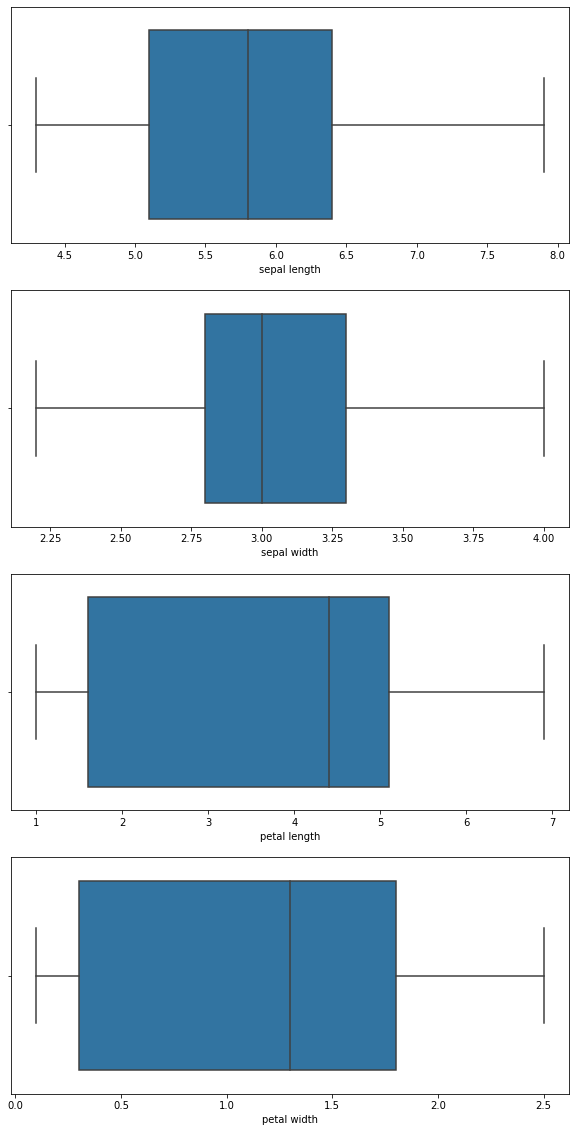

In [16]:
#Box Plot for each input variable
features = ['sepal length','sepal width','petal length','petal width']
f, axes = plt.subplots(len(features), figsize = (10,20))
for i,j in enumerate(features):
    sns.boxplot(x=j,data=df, ax=axes[i])

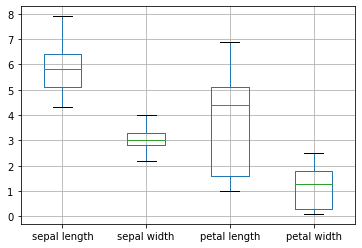

In [20]:
pd.plotting.boxplot_frame(df)
plt.show()

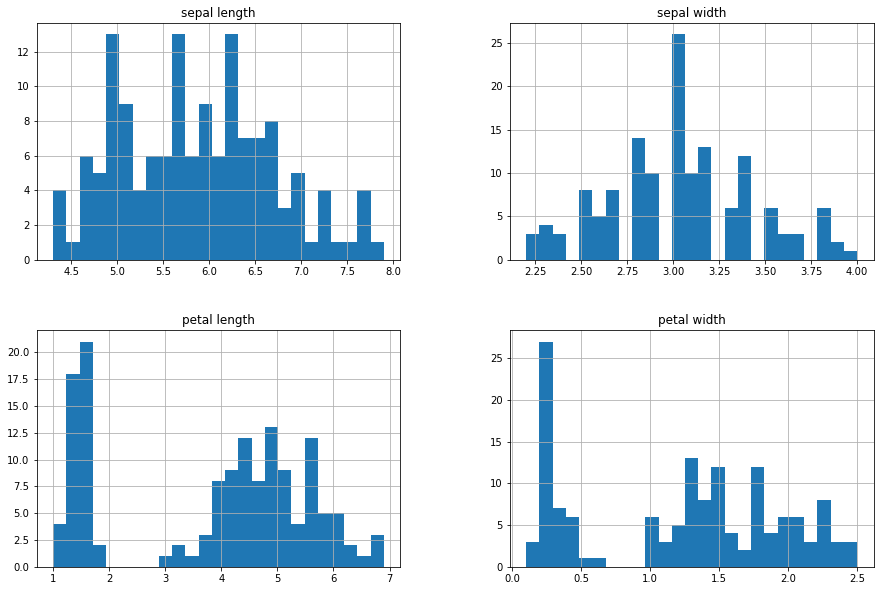

In [18]:
df.hist(figsize=(15,10),bins=25)
plt.show()

In [22]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for index, row in df.iterrows() :
    if row['class']=='Iris-setosa' :
        colors.append('red')
    elif row['class']=='Iris-versicolor' :
        colors.append('yellow')
    elif row['class']=='Iris-virginica' :
        colors.append('green')
    else:
        colors.append('black')
        
# Inspect the first 10 values in your list        
colors[:10]

['red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']

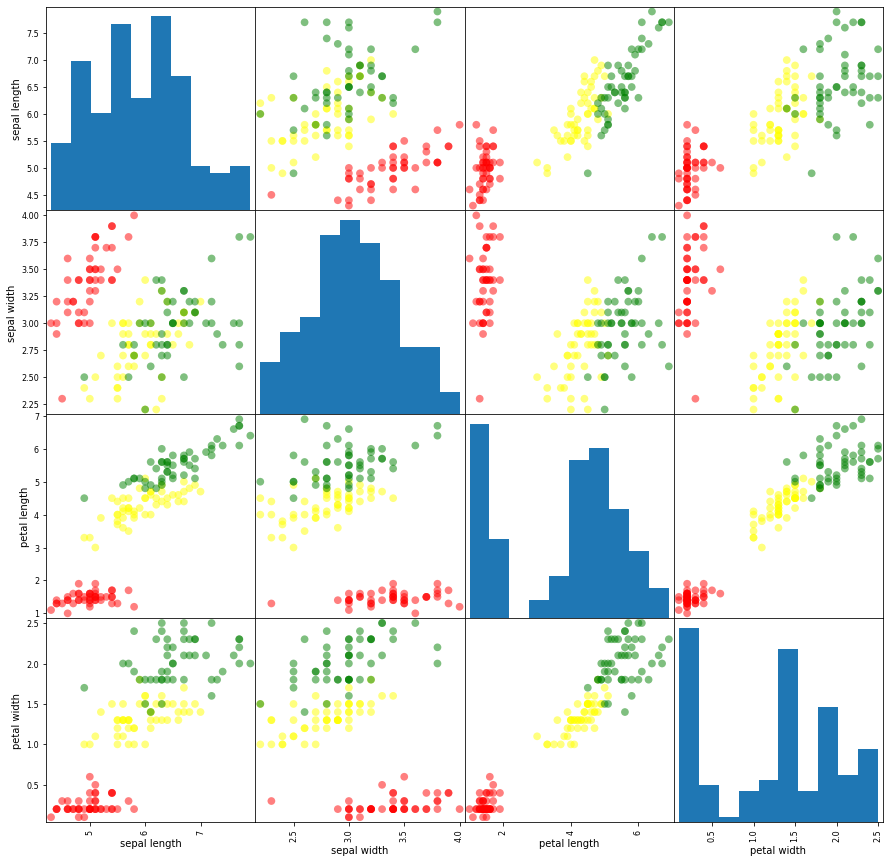

In [23]:
#scatter Plot for two input variables
#df.plot(x='petal length', y=)
pd.plotting.scatter_matrix(df, figsize=(15,15), s=60, marker='o', c=colors)
plt.show()

In [24]:
#Statistical Summary after cleaning
df.describe()

,sepal length,sepal width,petal length,petal width
count,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769
std,0.835045,0.398222,1.750824,0.754538
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [25]:
# Split the data into training and testing
X=df.drop('class',axis=1)
y=df['class']

In [26]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.89


In [28]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.94


In [29]:
#K nearest nighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.94


In [30]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.94


In [31]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.94


# Split with (60 : 40) :

In [32]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.6,test_size=0.4 ,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.90


In [34]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.93


In [35]:
#K nearest nighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95


In [36]:
#K nearest nighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.95


In [39]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.93


In [40]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.98
Accuracy of GNB classifier on test set: 0.93
